*Ejercicio 1

# Ejercicio 1

Crear una imagen mostrando la distribución de los eventos por año

Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$
Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

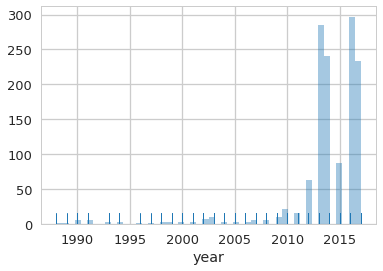

In [2]:
#Importamos las librerias que vamos a utilizar

%matplotlib inline
import pandas
import numpy
import seaborn

seaborn.set_style('whitegrid')
seaborn.set_context('talk')

#Cargamos en una variable llamada "Dataset" los datos del csv de violencia
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv', encoding='utf8')

import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)

#mediante la libreria seaborn graficamos la distribucion de eventos por año. 
#se usa el .dropna() para quitar los valores vacios. Que por eso daba error la generacion de la distribucion.

seaborn.distplot(dataset.year.dropna(), kde=False, rug=True);


Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

        fdp(Y)


In [3]:
#Construccion de tabla de frecuencia de probabilidades. Considerando el año.
#Primero tomamos para cada año, la cantidad de ocurrencias.

pandas.value_counts(dataset['year'].dropna())

2016.0    297
2013.0    285
2014.0    241
2017.0    234
2015.0     87
2012.0     62
2010.0     21
2011.0     16
2009.0     10
2003.0      9
2002.0      7
2007.0      5
1990.0      5
2008.0      5
1991.0      5
2000.0      3
1994.0      3
2006.0      3
2005.0      3
2001.0      3
1993.0      2
1998.0      2
2004.0      2
1999.0      2
1989.0      1
1996.0      1
1997.0      1
1988.0      1
Name: year, dtype: int64

In [4]:
#ahora dividimos esa cantidad de ocurrencias de cada año, por el total.
#tenemos que usar dropna porque sino genera mal la distribucion... por los valores nulos (N/A)

dataset['year'].dropna().value_counts() / len(dataset['year'].dropna())

2016.0    0.225684
2013.0    0.216565
2014.0    0.183131
2017.0    0.177812
2015.0    0.066109
2012.0    0.047112
2010.0    0.015957
2011.0    0.012158
2009.0    0.007599
2003.0    0.006839
2002.0    0.005319
2007.0    0.003799
1990.0    0.003799
2008.0    0.003799
1991.0    0.003799
2000.0    0.002280
1994.0    0.002280
2006.0    0.002280
2005.0    0.002280
2001.0    0.002280
1993.0    0.001520
1998.0    0.001520
2004.0    0.001520
1999.0    0.001520
1989.0    0.000760
1996.0    0.000760
1997.0    0.000760
1988.0    0.000760
Name: year, dtype: float64

*Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?*

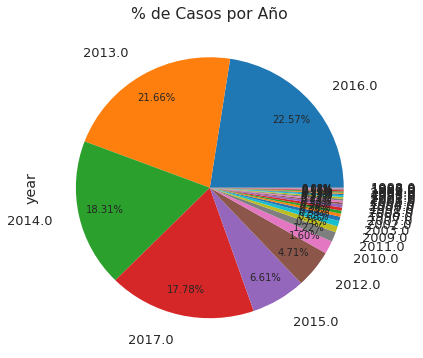

In [28]:
#Para graficar podemos utilizar un grafico de barras o un grafico de tortas. Es decir, lo que queremos reflejar es
#como se distribuyen las probabilidades en cada año. A mi entender lo mejor es un grafico de tortas. 

plot = dataset['year'].dropna().value_counts().plot(kind='pie', autopct='%.2f%%', 
                                            figsize=(6, 6),
                                            title='% de Casos por Año', pctdistance=0.8, labeldistance=1.2)
 

El inconveniente que presenta este grafico es que quedan muchos valores muy pequeños. 
Pero en realidad se esta reflejando la realidad, dado que hay años que tienen muy baja probabilidad. Lo que se podria hacer tambien es crear grupos de frecuencia

En cuanto a la consulta, si la observacion es analizar que el crecimiento de casos a lo largo del tiempo, el grafico de Histograma, que tiene el tiempo en el eje X, nos permite ver mas claramente como aumentaron los casos en los ultimos años. En cambio, en el grafico de torta, si bien esta informacion esta, no se puede ver tan claramente al no tener un eje que refleje el paso de los años

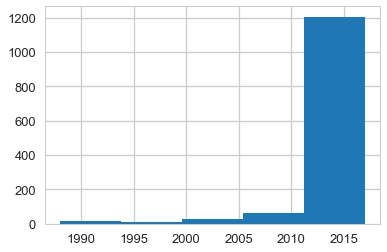

In [83]:
#Para crear un histograma con grupos de frecuencia, se necesita el siguiente codigo.

import matplotlib.pyplot as plt 
datasetAñoSinNulos=dataset['year'].dropna()

hist, bin_edges = numpy.histogram(datasetAñoSinNulos, 5)
plt.hist(datasetAñoSinNulos, bins=bin_edges)
plt.show()



*¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?*

Si, aumento considerablemente en los ultimos años. Desde 2013 en adelante

Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

In [64]:
#Graficando Función de Distribución Acumulada con Python
# Fuente utilizada https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

import matplotlib.pyplot as plt 
from scipy import stats 

#n, p = 30, 0.4 # parametros de forma de la distribución binomial

x=100 * dataset['year'].dropna().value_counts() / len(dataset['year'].dropna())

# x_1 = numpy.linspace(stats.norm(10, 1.2).ppf(0.01),stats.norm(10, 1.2).ppf(0.99), 100)
#fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
#fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
#plt.plot(x, fda_binom, '--', label='FDA binomial')
#plt.plot(x, fda_normal, label='FDA nomal')
#plt.title('Función de Distribución Acumulada')
#plt.ylabel('probabilidad')
#plt.xlabel('valores')
#plt.legend(loc=4)
#plt.show()


#cumsums = dataset.groupby(['year']).sum().fillna(0).groupby(level=0).cumsum()
#dataset.set_index(['year'], inplace=True)
#dataset['dataset['year'].dropna().value_counts()'] = cumsums
#dataset.reset_index(inplace=True)
#print(dataset)

(1986.388888888889, 2018.6111111111106)

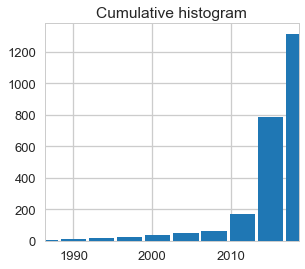

In [150]:


res = stats.cumfreq(dataset['year'].dropna())


x = res.lowerlimit + numpy.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))

ax2 = fig.add_subplot(1, 2, 2)

ax2.bar(x, res.cumcount, width=res.binsize)
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])






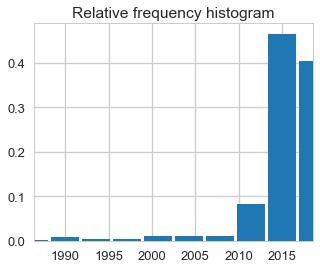

In [136]:
import matplotlib.pyplot as plt
from scipy import stats

res = stats.relfreq(dataset['year'].dropna())
res.frequency

numpy.sum(res.frequency)  # con esto valido que la frecuencia suma 1. 
x = res.lowerlimit + numpy.linspace(0, res.binsize*res.frequency.size, res.frequency.size)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, res.frequency, width=res.binsize)
ax.set_title('Relative frequency histogram')
ax.set_xlim([x.min(), x.max()])

plt.show()



Solucion Distribucion de Frecuencia acumulada


In [153]:
#Primero genero las probabilidades de frecuencia para cada año, ordenado

fdps = dataset.year.dropna().value_counts(normalize=True).sort_index()
print (fdps)

1988.0    0.000760
1989.0    0.000760
1990.0    0.003799
1991.0    0.003799
1993.0    0.001520
1994.0    0.002280
1996.0    0.000760
1997.0    0.000760
1998.0    0.001520
1999.0    0.001520
2000.0    0.002280
2001.0    0.002280
2002.0    0.005319
2003.0    0.006839
2004.0    0.001520
2005.0    0.002280
2006.0    0.002280
2007.0    0.003799
2008.0    0.003799
2009.0    0.007599
2010.0    0.015957
2011.0    0.012158
2012.0    0.047112
2013.0    0.216565
2014.0    0.183131
2015.0    0.066109
2016.0    0.225684
2017.0    0.177812
Name: year, dtype: float64


In [154]:
#acumulo sobre esta tabla que genere

c=fdps.cumsum()
print(c)

1988.0    0.000760
1989.0    0.001520
1990.0    0.005319
1991.0    0.009119
1993.0    0.010638
1994.0    0.012918
1996.0    0.013678
1997.0    0.014438
1998.0    0.015957
1999.0    0.017477
2000.0    0.019757
2001.0    0.022036
2002.0    0.027356
2003.0    0.034195
2004.0    0.035714
2005.0    0.037994
2006.0    0.040274
2007.0    0.044073
2008.0    0.047872
2009.0    0.055471
2010.0    0.071429
2011.0    0.083587
2012.0    0.130699
2013.0    0.347264
2014.0    0.530395
2015.0    0.596505
2016.0    0.822188
2017.0    1.000000
Name: year, dtype: float64


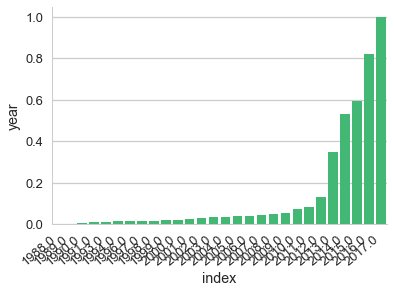

In [160]:
#ahora la grafico

c=fdps.cumsum()

ax = seaborn.barplot(data=c.to_frame().reset_index(),
    x='index', y='year', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
seaborn.despine()


¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno? La probabilidad es de 59%, tomando el 2015 como ultimo año de gobierno del anterior gobierno

*¿Que hacemos con los datos faltantes?* 

A priori podemos no considerarlos ya que no contamos con datos suficientes para corregirlos.